In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [10]:
data = pd.read_csv('heart.csv').dropna()

In [11]:
data1 = data[['age', 'trestbps', 'thalach', 'target']]
data1

,age,trestbps,thalach,target
0,63,145,150,1
1,37,130,187,1
2,41,130,172,1
3,56,120,178,1
4,57,120,163,1
...,...,...,...,...
298,57,140,123,0
299,45,110,132,0
300,68,144,141,0
301,57,130,115,0


In [12]:
print("Age mean:", data1.iloc[:, 0].mean())
print("Resting blood pressure mean:", data1.iloc[:, 1].mean())
print("Thalach mean:", data1.iloc[:, 2].mean())
print("Age std:", data1.iloc[:, 0].std())
print("Resting blood pressure std:", data1.iloc[:, 1].std())
print("Thalach std:", data1.iloc[:, 2].std())

Age mean: 54.366336633663366
Resting blood pressure mean: 131.62376237623764
Thalach mean: 149.64686468646866
Age std: 9.082100989837857
Resting blood pressure std: 17.5381428135171
Thalach std: 22.905161114914094


**Posterior 1**

In [13]:
posterior1_model = CmdStanModel(stan_file='posterior1.stan')
data_model = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2], 'y': data1.iloc[:, 3]}
sim = posterior1_model.sample(data=data_model,
                        iter_sampling=1,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim.draws_pd()

12:27:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

12:27:31 - cmdstanpy - INFO - CmdStan done processing.


In [14]:
posterior1

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,log_lik[294],log_lik[295],log_lik[296],log_lik[297],log_lik[298],log_lik[299],log_lik[300],log_lik[301],log_lik[302],log_lik[303]
0,1.0,1.0,1.0,-207.841,0.985336,0.123536,4.0,15.0,0.0,209.639,...,-0.836672,-0.746526,-0.806043,-0.782351,-0.65888,-0.732388,-0.71741,-0.81375,-0.710868,-0.870043


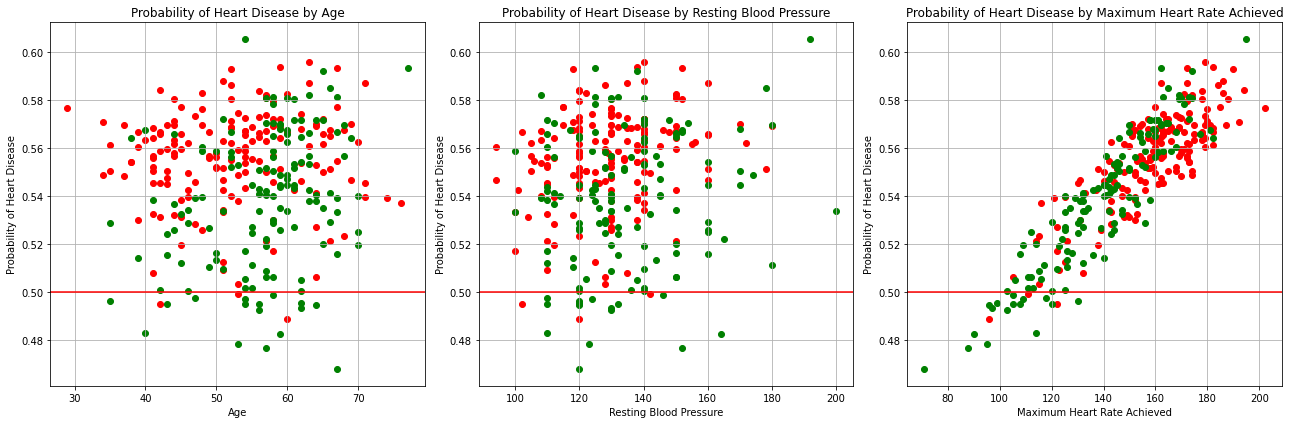

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Probability of heart disease by age
for i in range(len(data1)):
    if data1.iloc[i, 3]: # people with heart disease
        axs[0].scatter(data1.iloc[i, 0], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
    else:                # people without heart disease
        axs[0].scatter(data1.iloc[i, 0], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].grid()

# Plot 2: Probability of heart disease by resting blood pressure
for i in range(len(data1)):
    if data1.iloc[i, 3]:
        axs[1].scatter(data1.iloc[i, 1], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
    else:
        axs[1].scatter(data1.iloc[i, 1], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].grid()

# Plot 3: Probability of heart disease by maximum heart rate achieved
for i in range(len(data1)):
    if data1.iloc[i, 3]:
        axs[2].scatter(data1.iloc[i, 2], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
    else:
        axs[2].scatter(data1.iloc[i, 2], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].grid()

# Adjust layout
plt.tight_layout()
plt.show()

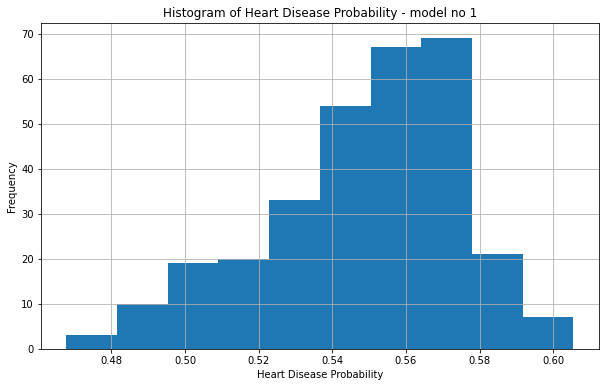

In [26]:
histogram_data = []
for i in range(len(data1)):
    histogram_data.append(posterior1[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Posterior 2nd try

In [27]:
posterior1_model = CmdStanModel(stan_file='posterior1_2nd_try.stan')
data_model = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2], 'y': data1.iloc[:, 3]}
sim = posterior1_model.sample(data=data_model,
                        iter_sampling=1,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim.draws_pd()

12:42:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

12:42:39 - cmdstanpy - INFO - CmdStan done processing.


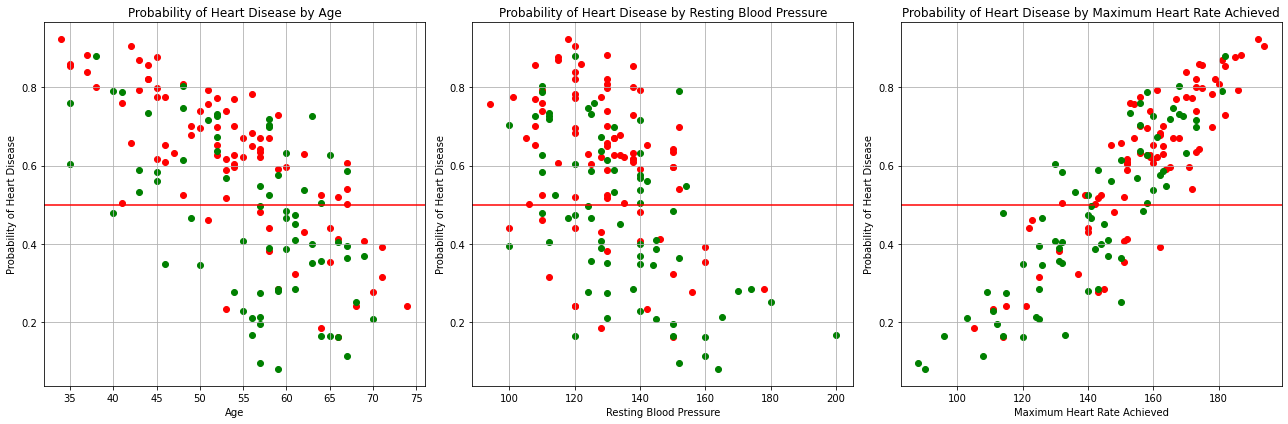

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Probability of heart disease by age
for i in range(len(data1)):
    if i % 2:
        if data1.iloc[i, 3]: # people with heart disease
            axs[0].scatter(data1.iloc[i, 0], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
        else:                # people without heart disease
            axs[0].scatter(data1.iloc[i, 0], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].grid()

# Plot 2: Probability of heart disease by resting blood pressure
for i in range(len(data1)):
    if i % 2:
        if data1.iloc[i, 3]:
            axs[1].scatter(data1.iloc[i, 1], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
        else:
            axs[1].scatter(data1.iloc[i, 1], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].grid()

# Plot 3: Probability of heart disease by maximum heart rate achieved
for i in range(len(data1)):
    if i % 2:
        if data1.iloc[i, 3]:
            axs[2].scatter(data1.iloc[i, 2], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='r')
        else:
            axs[2].scatter(data1.iloc[i, 2], posterior1[f"combined_heart_disease_prob[{i + 1}]"], c='g')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].grid()

# Adjust layout
plt.tight_layout()
plt.show()

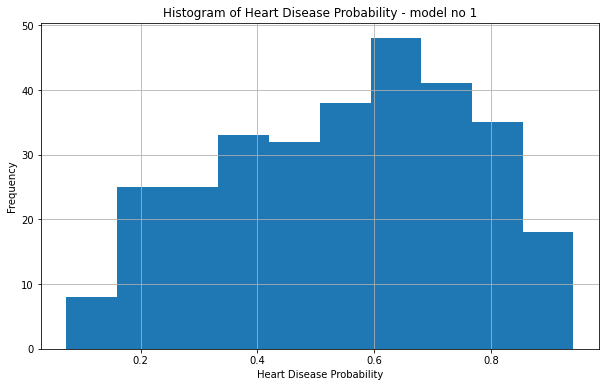

In [29]:
histogram_data = []
for i in range(len(data1)):
    histogram_data.append(posterior1[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()